In [35]:
import pandas as pd
import numpy as np
import networkx as nx
from node2vec import Node2Vec
from sklearn.cluster import DBSCAN,KMeans
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('Payments.csv')
G = nx.MultiDiGraph()

for index,row in df.iterrows():
    G.add_edge(row['Sender'], row['Receiver'], weight=row['Amount'])

print(G.number_of_nodes(), G.number_of_edges())

799 130535


In [37]:
node2vec = Node2Vec(G, dimensions=16, walk_length=10, num_walks=150, workers=8)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

Generating walks (CPU: 7): 100%|██████████| 18/18 [00:00<00:00, 37.05it/s]


In [38]:
node_embeddings = {str(node): model.wv[str(node)] for node in G.nodes()}
X = pd.DataFrame(node_embeddings).T.values

/home/maharshi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


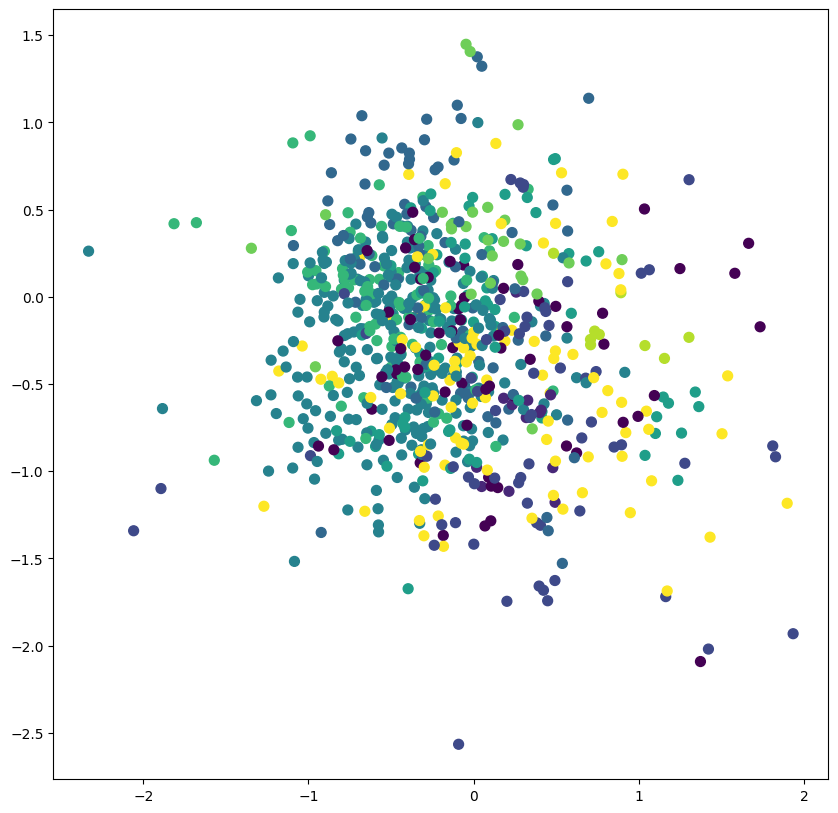

In [39]:
kmeans = KMeans(n_clusters=10)  # You can adjust the number of clusters
kmeans.fit(X)
clusters = kmeans.labels_

plt.figure(figsize=(10, 10))


